In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train = pd.read_csv('/kaggle/input/predicting-depression-machine-learning-challenge/train.csv')
test = pd.read_csv('/kaggle/input/predicting-depression-machine-learning-challenge/test.csv')

submission = pd.read_csv('/kaggle/input/predicting-depression-machine-learning-challenge/sample_submission.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder

#train["is_profession_missing"] = train["Profession"].notna().astype(int)
#train["is_Work_Pressure_missing"] = train["Work Pressure"].notna().astype(int)
#train["is_Job_Satisfaction_missing"] = train["Job Satisfaction"].notna().astype(int)

#test["is_profession_missing"] = test["Profession"].notna().astype(int)
#test["is_Work_Pressure_missing"] = test["Work Pressure"].notna().astype(int)
#test["is_Job_Satisfaction_missing"] = test["Job Satisfaction"].notna().astype(int)


# Fill missing values
for col in ["Degree", "Financial Stress", "Dietary Habits"]:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(train[col].mode()[0], inplace=True)

for col in ["Work Pressure", "Job Satisfaction"]:
    train[col].fillna(train[col].median(), inplace=True)
    test[col].fillna(train[col].median(), inplace=True)

train["Profession"].fillna("Unknown", inplace=True)
test["Profession"].fillna("Unknown", inplace=True)

# Drop unnecessary columns
train.drop(["Academic Pressure", "CGPA", "Study Satisfaction"], axis=1, inplace=True)
test.drop(["Academic Pressure", "CGPA", "Study Satisfaction"], axis=1, inplace=True)

# Encode categorical columns
categorical_columns = ['Gender', 'Working Professional or Student','Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])  
    label_encoders[col] = le  

<ipython-input-3-d0942f5cc83c>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0], inplace=True)
<ipython-input-3-d0942f5cc83c>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [54]:
#health_status = ['Healthy', 'Unhealthy', 'Moderate', 'More Healthy', 'No Healthy', 'Less Healthy', '5 Healthy', '5 Unhealthy', 'Resistant']
Good_Health=['Healthy','More Healthy', '5 Healthy']
Bad_Health=['Unhealthy','No Healthy','Less Healthy','5 Unhealthy']
Moderate_Health=['Moderate','Resistant']
diet_lifestyle = ['Indoor', 'Electrician', 'MCA', 'Mealy', 'Hormonal', 'Vegas', 'Male', 'Soham', 'Pratham', 'Vivaan', 'Raghav', 'Naina', 'Kolkata']
education_occupation = ['BSc', 'Class 12', 'Academic', 'MCA']
other = ['Gender', 'Yes', 'No Healthy', 'Mealy']

# Function to classify values
def classify(value):
    if value in Good_Health:
        return 'Good_Health'
    elif value in Bad_Health:
        return 'Bad_Health'
    elif value in Moderate_Health:
        return 'Moderate_Health'
    elif value in diet_lifestyle:
        return 'Diet/Lifestyle'
    elif value in education_occupation:
        return 'Education/Occupation'
    elif value in other:
        return 'Other'
    else:
        return 'Uncategorized'

# Apply classification
train['Dietary_Habits_new'] = train['Dietary Habits'].apply(classify)
test['Dietary_Habits_new'] = test['Dietary Habits'].apply(classify)

In [55]:
education_map = {
    "High School": ["Class 11", "Class 12"],
    
    "Diploma": [
        "B.Ed", "B.P.Ed", "L.Ed", "LCA", "RCA", "HCA", "N.Pharm", "S.Pharm", 
        "A.Ed", "E.Ed", "I.Ed", "J.Ed", "G.Ed", "K.Ed", "M.B.Ed", "M.M.Ed"
    ],
    
    "Bachelor's": [
        "B.Tech", "BE", "BSc", "B.Sc", "B.Arch", "B.B.Arch", "BBA", "B.Com", "B.Ed", "BCA",
        "B.Pharm", "BPharm", "BPA", "BHM", "B Student", "BArch", "BTech", "B.Com", "B.H", 
        "B.CA", "B.BA", "B.BCA", "B.Press", "B.B.Tech", "B.M.Com", "B.Financial Analyst"
    ],
    
    "Master's": [
        "M.Tech", "M_Tech", "MTech", "ME", "MSc", "MBA", "M.Com", "M.Ed", "MPharm", 
        "M.Pharm", "MPA", "MHM", "M.Arch", "M.S", "M. Business Analyst", "MA", "MCA", 
        "M.UI", "M.", "M.M.Ed"
    ],
    
    "Doctorate": ["PhD", "MD", "MBBS"],
    
    "Law": ["LLB", "LLBA", "LLM", "LL.Com", "LLCom", "LL B.Ed", "LLS", "LLEd"],
    
    "Other": [
        "Plumber", "Entrepreneur", "Working Professional", "Data Scientist", "HR Manager",
        "UX/UI Designer", "Business Analyst", "Doctor", "Mechanical Engineer", "Travel Consultant"
    ]
}

def map_education(value):
    for category, degrees in education_map.items():
        if value in degrees:
            return category
    return "Unknown"

train["Degree_new"] = train["Degree"].apply(map_education)
test["Degree_new"] = test["Degree"].apply(map_education)

In [33]:
profession_map = {
    "Education": ["Teacher", "Educational Consultant", "Academic", "B.Ed", "M.Ed"],
    "Healthcare": ["Chemist", "Pharmacist", "Medical Doctor", "Doctor", "Surgeon", "MBBS", "MD", "PhD"],
    "Engineering & Technology": ["Software Engineer", "Mechanical Engineer", "Civil Engineer", "B.Tech", "BE", "BCA", "M.Tech", "ME", "MCA", "M.Pharm"],
    "Business & Finance": ["Financial Analyst", "Investment Banker", "Business Analyst", "Manager", "City Manager", "Entrepreneur", "HR Manager", "Marketing Manager", "Sales Executive", "Consultant", "Digital Marketer"],
    "Law": ["Lawyer", "LLB", "LLBA", "LLM", "LL.Com", "LLCom", "LL B.Ed", "LLS", "LLEd"],
    "Creative & Design": ["Graphic Designer", "Content Writer", "UX/UI Designer", "Architect", "Chef", "Pilot", "Graphic Designer", "Content Writer"],
    "Trades & Services": ["Plumber", "Electrician", "Customer Support", "Travel Consultant"],
    "Research & Analysis": ["Research Analyst", "Analyst", "Researcher", "Data Scientist"],
    "Student & Academic": ["Student", "B.Com", "MBA", "BCA", "MCA", "BBA", "M.Ed"]
    #"Unclassified": ["Unemployed", "No", "Name", "FamilyVirar", "Visakhapatnam", "Yuvraj", "3M", "Manvi", "Samar", "Surat", "Pranav", "Unhealthy"]
}

def map_job(value):
    for category, titles in profession_map.items():
        if value in titles:
            return category
    return "Unknown"

train["Profession_new"] = train["Profession"].apply(map_job)
test["Profession_new"] = test["Profession"].apply(map_job)


In [34]:
cities = [
    'Agra', 'Ahmedabad', 'Bangalore', 'Bhopal', 'Chennai', 'Delhi', 'Faridabad', 'Ghaziabad', 'Gurgaon', 'Hyderabad', 'Indore', 'Jaipur', 'Kalyan',
    'Kanpur', 'Kolkata', 'Lucknow', 'Ludhiana', 'Meerut', 'Mumbai', 'Nagpur', 'Nashik', 'Patna', 'Pune', 'Rajkot', 'Srinagar', 'Surat', 'Thane', 
    'Vadodara', 'Varanasi', 'Vasai-Virar', 'Visakhapatnam'
]

def city_map(value):
    if value in cities:
        return value
    return "Unknown"

train["City_new"] = train["City"].apply(city_map)
test["City_new"] = test["City"].apply(city_map)

def in_a_city(value):
    if value in cities:
        return 1
    return 0

#train["In_A_City"] = train["City"].apply(in_a_city)
#test["In_A_City"] = test["City"].apply(in_a_city)



In [35]:
def categorize(value):
    # Time-related categories
    short_duration = ['Less than 5 hours', '1-2 hours', '1-3 hours', '3-4 hours', '4-5 hours', '4-6 hours', '2-3 hours', '3-6 hours', '6 hours']
    medium_duration = ['than 5 hours','6-7 hours', '7-8 hours', '6-8 hours', '8 hours','More than 8 hours','8-9 hours','9-10 hours','9-11 hours','10-11 hours']
    long_duration = [ '9-5 hours', '9-6 hours', '10-6 hours', '20-21 hours', '60-65 hours', '50-75 hours', '40-45 hours', '45-48 hours', '55-66 hours', '45 hours', '49 hours']
    
    # Special situations
    special_situations = ['Unhealthy', 'Have_you_ever_had_suicidal_thoughts', 'Work_Study_Hours', 'Sleep_Duration', 'Vivan', 'No']
    
    # Location/Event
    location_event = ['Meerut', 'Pune', 'Indore', '9-5']
    
    # Miscellaneous categories
    ambiguous = ['0', '8-89 hours', 'Galesabad']

    if value in short_duration:
        return 'Short Duration'
    elif value in medium_duration:
        return 'Medium Duration'
    elif value in long_duration:
        return 'Long Duration'
    elif value in special_situations:
        return 'Special Situations'
    elif value in location_event:
        return 'Location/Event'
    elif value in ambiguous:
        return 'Miscellaneous'
    else:
        return 'Unknown'

# Example usage
train['Sleep Duration_new'] = train['Sleep Duration'].apply(categorize)
test['Sleep Duration_new'] = test['Sleep Duration'].apply(categorize)


In [4]:
train["new_col"] = train["Work Pressure"] + train["Job Satisfaction"]

In [5]:
df =  pd.concat([train, test], axis =0)

In [6]:
df.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Work Pressure                                0
Job Satisfaction                             0
Sleep Duration                               0
Dietary Habits                               0
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                               93800
new_col                                  93800
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

label_encoders = {}
#'City_new','Dietary_Habits_new','Sleep Duration_new'
for col in ['City', 'Dietary Habits','Sleep Duration','Profession','Degree']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

def one_hot_encode_and_add(train, column):
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = one_hot_encoder.fit_transform(train[[column]])
    encoded_columns = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out([column]))
    encoded_columns.index = train.index
    train = pd.concat([train, encoded_columns], axis=1)
    train = train.drop(columns=[column])
    return train

#columns_to_encode = ['Profession_new', 'Degree_new']#,'In_A_City'

#for col in columns_to_encode:
#    df = one_hot_encode_and_add(df, col)


In [8]:
train = df.dropna(subset=['new_col'])
test = df[df['new_col'].isna()]

test = test.drop(columns=['new_col'])
train = train.drop(columns=['new_col'])
test = test.drop(columns=['Depression'])

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  int64  
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  int64  
 5   Working Professional or Student        140700 non-null  int64  
 6   Profession                             140700 non-null  int64  
 7   Work Pressure                          140700 non-null  float64
 8   Job Satisfaction                       140700 non-null  float64
 9   Sleep Duration                         140700 non-null  int64  
 10  Dietary Habits                         140700 non-null  int64

In [9]:
train= train.drop(columns=['Name'])
test= test.drop(columns=['Name'])

In [ ]:
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer  # For handling missing values
import numpy as np
import pandas as pd

# Separate features and target variable
X = train.drop(columns=["Depression"])
y = train["Depression"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify categorical columns
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Convert categorical columns to string type
for col in categorical_features:
    X_train.loc[:, col] = X_train[col].astype(str)
    X_test.loc[:, col] = X_test[col].astype(str)

# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align the columns of X_train and X_test to ensure they are the same
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # Use mean, or change to 'median' or 'most_frequent' as needed
X_train_encoded = imputer.fit_transform(X_train_encoded)
X_test_encoded = imputer.transform(X_test_encoded)

# Convert to CatBoost Pool (for CatBoost only)
train_pool = Pool(X_train, label=y_train, cat_features=categorical_features)
test_pool = Pool(X_test, label=y_test, cat_features=categorical_features)

# Define base models
catboost = CatBoostClassifier(iterations=500, learning_rate=0.05, max_depth=8, verbose=0)
xgb = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=8, verbosity=0)
rf = RandomForestClassifier(n_estimators=500, max_depth=8, random_state=42)

# Train base models
catboost.fit(train_pool)  # Use train_pool for CatBoost
xgb.fit(X_train_encoded, y_train)  # Use the encoded data for XGBoost
rf.fit(X_train_encoded, y_train)  # Use the encoded data for RandomForest

# Get predictions for training meta-learner
train_preds = np.column_stack([
    catboost.predict_proba(train_pool)[:, 1],  # Use train_pool for CatBoost
    xgb.predict_proba(X_train_encoded)[:, 1],  # Use encoded data for XGBoost
    rf.predict_proba(X_train_encoded)[:, 1]   # Use encoded data for RandomForest
])

# Get predictions for testing
test_preds = np.column_stack([
    catboost.predict_proba(test_pool)[:, 1],  # Use test_pool for CatBoost
    xgb.predict_proba(X_test_encoded)[:, 1],  # Use encoded data for XGBoost
    rf.predict_proba(X_test_encoded)[:, 1]    # Use encoded data for RandomForest
])

# Define meta-learner (Logistic Regression)
meta_learner = LogisticRegression()
meta_learner.fit(train_preds, y_train)

# Final stacked model predictions
final_predictions = meta_learner.predict(test_preds)

# Evaluate accuracy
accuracy = accuracy_score(y_test, final_predictions)
print(f"Stacking Model Accuracy: {accuracy:.4f}")


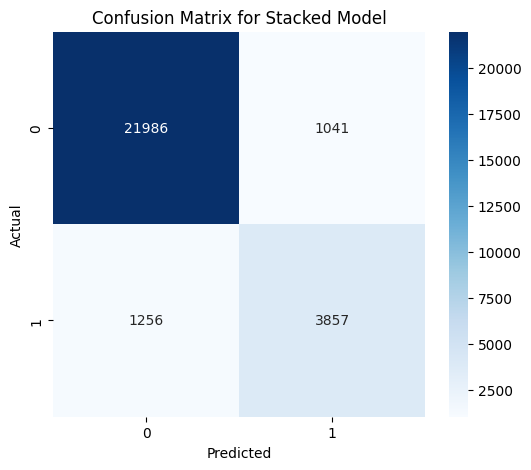

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, final_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Stacked Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [17]:
# Load the separate test dataset
#test_data = pd.read_csv('test_file.csv')

# Separate the features (excluding the target variable)
X_test_final = test # Adjust the column names as needed

# Convert categorical columns to string type (same as training data)
for col in categorical_features:
    X_test_final.loc[:, col] = X_test_final[col].astype(str)

# One-hot encode categorical columns
X_test_final_encoded = pd.get_dummies(X_test_final, drop_first=True)

# Align the columns to match the training data (important after one-hot encoding)
X_test_final_encoded, _ = X_test_final_encoded.align(X_train_encoded, join='left', axis=1)

# Impute missing values using the same imputer as used during training
X_test_final_encoded = imputer.transform(X_test_final_encoded)

# Get predictions for the test data using the stacked models
test_preds = np.column_stack([
    catboost.predict_proba(Pool(X_test_final, cat_features=categorical_features))[:, 1],  # CatBoost
    xgb.predict_proba(X_test_final_encoded)[:, 1],  # XGBoost
    rf.predict_proba(X_test_final_encoded)[:, 1]     # RandomForest
])

# Use the meta-learner (Logistic Regression) for the final prediction
final_test_predictions = meta_learner.predict(test_preds)

# Assuming `test_data` has an 'id' column, create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': test['id'],  # Adjust this if 'id' is not the correct column in the test data
    'Depression': final_test_predictions.astype(int)
})

# Save predictions to a CSV file (submission file)
submission_df.to_csv('submission_36.csv', index=False)

print("Submission file saved as 'submission_36.csv'")

Submission file saved as 'submission_36.csv'


In [15]:
#------------------------------------------There is an error

# Ensure X_train_encoded and X_test_final_encoded are DataFrames
X_train_encoded = pd.DataFrame(X_train_encoded)
#X_test_final_encoded = pd.DataFrame(X_test_final_encoded)
X_test_final_encoded = pd.DataFrame(X_test_encoded)


# Align the columns of the test data to match the training data (important after one-hot encoding)
X_test_final_encoded, _ = X_test_final_encoded.align(X_train_encoded, join='left', axis=1)

# Impute missing values in the test data using the same imputer
X_test_final_encoded = imputer.transform(X_test_final_encoded)

# Get predictions for the test data using the stacked models (CatBoost, XGBoost, RandomForest)
test_preds = np.column_stack([
    catboost.predict_proba(Pool(X_test_final, cat_features=categorical_features))[:, 1],  # CatBoost
    xgb.predict_proba(X_test_final_encoded)[:, 1],  # XGBoost
    rf.predict_proba(X_test_final_encoded)[:, 1]     # RandomForest
])

# Use the meta-learner (Logistic Regression) for the final prediction
final_test_predictions = meta_learner.predict(test_preds)

# Assuming `test` has an 'id' column, create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': test['id'],  # Adjust this if 'id' is not the correct column in the test data
    'Depression': final_test_predictions.astype(int)
})

# Save predictions to a CSV file (submission file)
submission_df.to_csv('submission_36.csv', index=False)

print("Submission file saved as 'submission_36.csv'")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


NameError: name 'X_test_final' is not defined

In [18]:
submission_df

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,0
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [19]:
submission_df["Depression"].value_counts()

Depression
0    79809
1    13991
Name: count, dtype: int64